# Hand shape classification

## Introduction

This notebook focuses on distinguishing amongst various signs in Indian Sign Language. It uses three methods for classification -
* Perceptron
* Deep Learning
* KNN

Of all, it is quite evident that KNN provides the best results.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix

data = pd.read_csv('data.csv')
print(data.describe())

no_of_classes = 5
label_indexes = {'a':0,'b':1,'c':2,'d':3,'e':4}

          angle_90            r  area_ellipse  area_contour        scale  \
count  2392.000000  2392.000000   2392.000000   2392.000000  2392.000000   
mean      0.345829   106.796061  18230.459253  14181.118729     0.198324   
std       0.123105    30.250331  11943.042445   8614.471126     0.086871   
min       0.001000    62.136000   5499.227000   4759.000000     0.076000   
25%       0.244000    86.707000  12446.131500   9841.625000     0.133000   
50%       0.365000   103.729500  15020.064000  11857.500000     0.189000   
75%       0.466000   113.924250  17253.413250  13661.250000     0.219000   
max       0.500000   190.342000  55717.077000  42069.500000     0.467000   

       eccentricity       norm_r  norm_area_ellipse  norm_area_contour  
count   2392.000000  2392.000000        2392.000000        2392.000000  
mean       0.701120     0.348346           0.253520           0.252533  
std        0.174225     0.235951           0.237825           0.230886  
min        0.078000    

## Data Visualisation using Scatter plots

_Here we can observe how data is distinguished when the features __angle__ and __eccentricity__ are compared from each class_

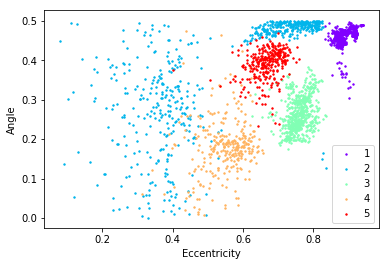

In [3]:
x_axis = data['eccentricity']
y_axis = data['angle_90']
labels = data['label']

x, y =[], []

for i in range(no_of_classes):
    x.append([])
    y.append([])

for i in range(len(labels)):
    j = label_indexes[labels[i]]
    x[j].append(x_axis[i])
    y[j].append(y_axis[i])
        
fig = plt.figure()
ax1 = fig.add_subplot(111)
xs = np.arange(10)
ys = [i+xs+(i*xs)**2 for i in range(no_of_classes)]
colors = iter(cm.rainbow(np.linspace(0, 1, len(ys))))

for i in range(1,no_of_classes+1):
    ax1.scatter(x[i-1], y[i-1], s=2, c=next(colors), label='%d'%(i))
plt.legend()
plt.xlabel('Eccentricity')
plt.ylabel('Angle')
plt.show()

_Here, we do comparison amongst the attributes __eccentricity__ and __area of contour (Hull)__ from each class_

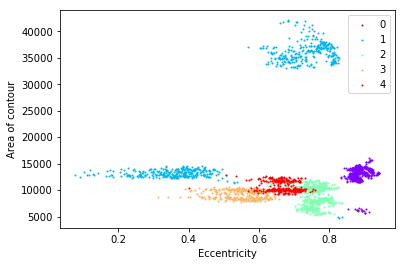

In [4]:
x_axis = data['eccentricity']
y_axis = data['area_contour']
labels = data['label']

x, y =[], []

for i in range(no_of_classes):
    x.append([])
    y.append([])

for i in range(0,len(labels)):
    j = label_indexes[labels[i]]
    x[j].append(x_axis[i])
    y[j].append(y_axis[i])

fig = plt.figure()
ax1 = fig.add_subplot(111)
xs = np.arange(10)
ys = [i+xs+(i*xs)**2 for i in range(no_of_classes)]
colors = iter(cm.rainbow(np.linspace(0, 1, len(ys))))

for i in range(no_of_classes):
    ax1.scatter(x[i], y[i], s=1, c=next(colors),label='%d'%(i))
plt.legend()
plt.xlabel('Eccentricity')
plt.ylabel('Area of contour')
plt.show()

_Here we consider __area of contour (Hull)__, __eccentricity__ and __radial distance__ to plot a 3D scatter plot_

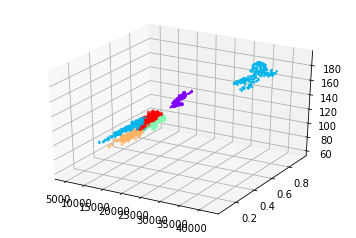

In [11]:
from mpl_toolkits.mplot3d import Axes3D
x_axis = data['area_contour']
y_axis = data['eccentricity']
z_axis = data['r']
labels = data['label']

x, y, z = [], [], []

for i in range(no_of_classes):
    x.append([])
    y.append([])
    z.append([])

for i in range(len(labels)):
    j = label_indexes[labels[i]]
    x[j].append(x_axis[i])
    y[j].append(y_axis[i])
    z[j].append(z_axis[i])
        

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = np.arange(10)
ys = [i+xs+(i*xs)**2 for i in range(no_of_classes)]
colors = iter(cm.rainbow(np.linspace(0, 1, len(ys))))

for i in range(1,no_of_classes+1):
    ax.scatter(x[i-1], y[i-1], z[i-1], s=i, c=next(colors), label='%d'%(i))
plt.show()

_Upon several observations, these 5 features provided the best classification accuracy:_

* Angle
* Radial distance (r)
* Scale
* Eccentricity
* Area of contour (Hull)

__Note that Random state of the `train_test_split` function has a considerable hand in altering the accuracy of the model__

## Using Perceptron learning for classification.

In [186]:
from sklearn.linear_model import perceptron
from numpy import array
import numpy as np
from random import randint

X = data[['angle_90', 'norm_r', 'scale',  'eccentricity', 'norm_area_contour']]
Y = data['label']

r_val = randint(1,1000)
print('Random state: %d'%(r_val))
X_train, X_test, Y_train, Y_test = tts(X,Y,test_size=0.3,random_state=285)
# 449, 680, 729, 942, 876, 285
classifier = perceptron.Perceptron(n_iter=30, verbose=0)
classifier.fit(X_train,Y_train)

print('Confusion matrix:')
predictions = classifier.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print('Accuracy on training set: %.3f' % (classifier.score(X_train,Y_train)*100))
print('Accuracy on testing set: %.3f' % (classifier.score(X_test,Y_test)*100))

Random state: 488
Confusion matrix:
[[174   0   6   0   0]
 [  0 162   2   0   4]
 [  0   0 183   0   0]
 [  0   0   0  88   1]
 [  1   1   0   0  96]]
Accuracy on training set: 97.551
Accuracy on testing set: 97.911


## Using Deep Learning

In [109]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from random import randint

X = data[['angle_90', 'norm_r', 'scale',  'eccentricity', 'norm_area_contour']].values.tolist()
Y = data['label'].values.tolist()

r_val = randint(1,1000)
print('Random state: %d'%(r_val))
X_train, X_test, Y_train, Y_test = tts(X,Y,test_size=0.3,random_state=r_val)
# 934,270,255
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_train_labels = encoder.transform(Y_train)
dummy_train_labels = np_utils.to_categorical(encoded_train_labels)

encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_test_labels = encoder.transform(Y_test)
dummy_test_labels = np_utils.to_categorical(encoded_test_labels)

model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu', name='h1'))
model.add(Dense(100, activation='relu', name='h2'))
model.add(Dense(no_of_classes, activation='softmax', name='op'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,dummy_train_labels,epochs=60,verbose=1,validation_split=0.3)

score = model.evaluate(X_test,dummy_test_labels)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Random state: 255
Train on 1171 samples, validate on 503 samples
Epoch 1/60
1171/1171 [==============================] - 1s 770us/step - loss: 1.5405 - acc: 0.4091 - val_loss: 1.4572 - val_acc: 0.4950
Epoch 2/60
1171/1171 [==============================] - 0s 79us/step - loss: 1.3943 - acc: 0.5064 - val_loss: 1.2947 - val_acc: 0.5487
Epoch 3/60
1171/1171 [==============================] - 0s 83us/step - loss: 1.2431 - acc: 0.6072 - val_loss: 1.1413 - val_acc: 0.6461
Epoch 4/60
1171/1171 [==============================] - 0s 85us/step - loss: 1.0943 - acc: 0.6934 - val_loss: 0.9983 - val_acc: 0.7495
Epoch 5/60
1171/1171 [==============================] - 0s 82us/step - loss: 0.9646 - acc: 0.7344 - val_loss: 0.8796 - val_acc: 0.7455
Epoch 6/60
1171/1171 [==============================] - 0s 80us/step - loss: 0.8484 - acc: 0.7387 - val_loss: 0.7774 - val_acc: 0.7435
Epoch 7/60
1171/1171 [==============================] - 0s 89us/step - loss: 0.7498 - acc: 0.7395 - val_loss: 0.6859 - val_a

718/718 [==============================] - 0s 43us/step

acc: 99.16%


## Using K-Nearest Neigbours (with n_neighbors=3)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from random import randint

X = data[['angle_90', 'norm_r', 'scale',  'eccentricity', 'norm_area_contour']]
Y = data['label']

r_val = randint(1,1000)
print('Random state = %4d'%(r_val))
X_train, X_test, Y_train, Y_test = tts(X,Y,test_size=0.3, random_state=700)
# 700,838,574
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
print(confusion_matrix(Y_test, predictions))

print('Training accuracy: %.3f' % (classifier.score(X_train, Y_train)))
print('Testing accuracy: %.3f' % (classifier.score(X_test, Y_test)))

test_file = pd.read_csv('Test cases for KNN shape classification.csv')
validate_X = test_file[['angle_90', 'norm_r', 'scale',  'eccentricity', 'norm_area_contour']]
validate_Y = test_file['Actual Class']
preds = classifier.predict(validate_X)
print('\nConfusion matrix on validation set:')
print(confusion_matrix(validate_Y, preds))
print('Validation accuracy: %.3f'%(classifier.score(validate_X, validate_Y)))

Random state =  739
[[182   0   0   0   0]
 [  0 175   0   0   0]
 [  0   0 174   0   0]
 [  0   0   0  96   1]
 [  0   0   0   0  90]]
Training accuracy: 0.999
Testing accuracy: 0.999

Confusion matrix on validation set:
[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
Validation accuracy: 1.000
